# Map of sub-domain of ANHA12

In [7]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
import pandas as pd

%matplotlib notebook

### Load relevant data

Bathymetry:

In [2]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]

In [3]:
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)

In [4]:
cond2 = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

Load station locations:

In [5]:
Pb_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = Pb_data['Station names'].dropna().astype('str')
lons = np.array(Pb_data['station lon'].dropna().astype('float').values)
lats = np.array(Pb_data['Station lat'].dropna().astype('float').values)

In [6]:
stn_names

0       K1
1      LS2
2      BB1
3      BB2
4      BB3
5     CAA1
6     CAA2
7     CAA3
8     CAA4
9     CAA5
10    CAA6
11    CAA7
12    CAA8
13    CAA9
14     CB1
15     CB2
16     CB3
17     CB4
Name: Station names, dtype: object

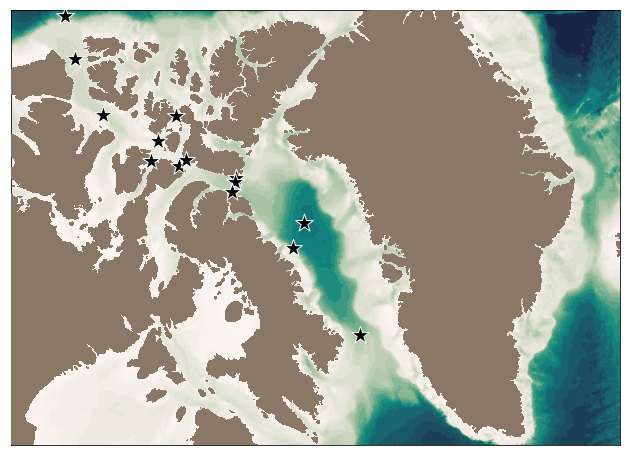

In [33]:
fig,ax = plt.subplots(figsize=(12,8))

proj=Basemap(projection='eqdc',lat_0 = 72.5, lon_0 = -65, resolution='i', width=3.5e6, height=2.5e6)

clevels=[0, 20, 40, 60, 80, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, \
         1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600]
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy, clevels, cmap=cmocean.cm.tempo, zorder=1)
proj.contourf(x_mesh, y_mesh, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=3)

x, y = proj(lons, lats)
proj.scatter(x, y, s=350, marker='*', c='k', edgecolors='w', zorder=4)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/IUGG_baffin-bay.png', bbox_inches='tight', dpi=700)

In [8]:
lon_features1 = [-147.5, -128, -51, -50, -112]
lat_features1 = [77.2, 86.5 , 74.5, 72.5, 63]

In [9]:
features = ['Beaufort Sea', 'Arctic Ocean', 'Kalaallit Nunaat','Greenland', 'Inuit Nunangat']

<IPython.core.display.Javascript object>


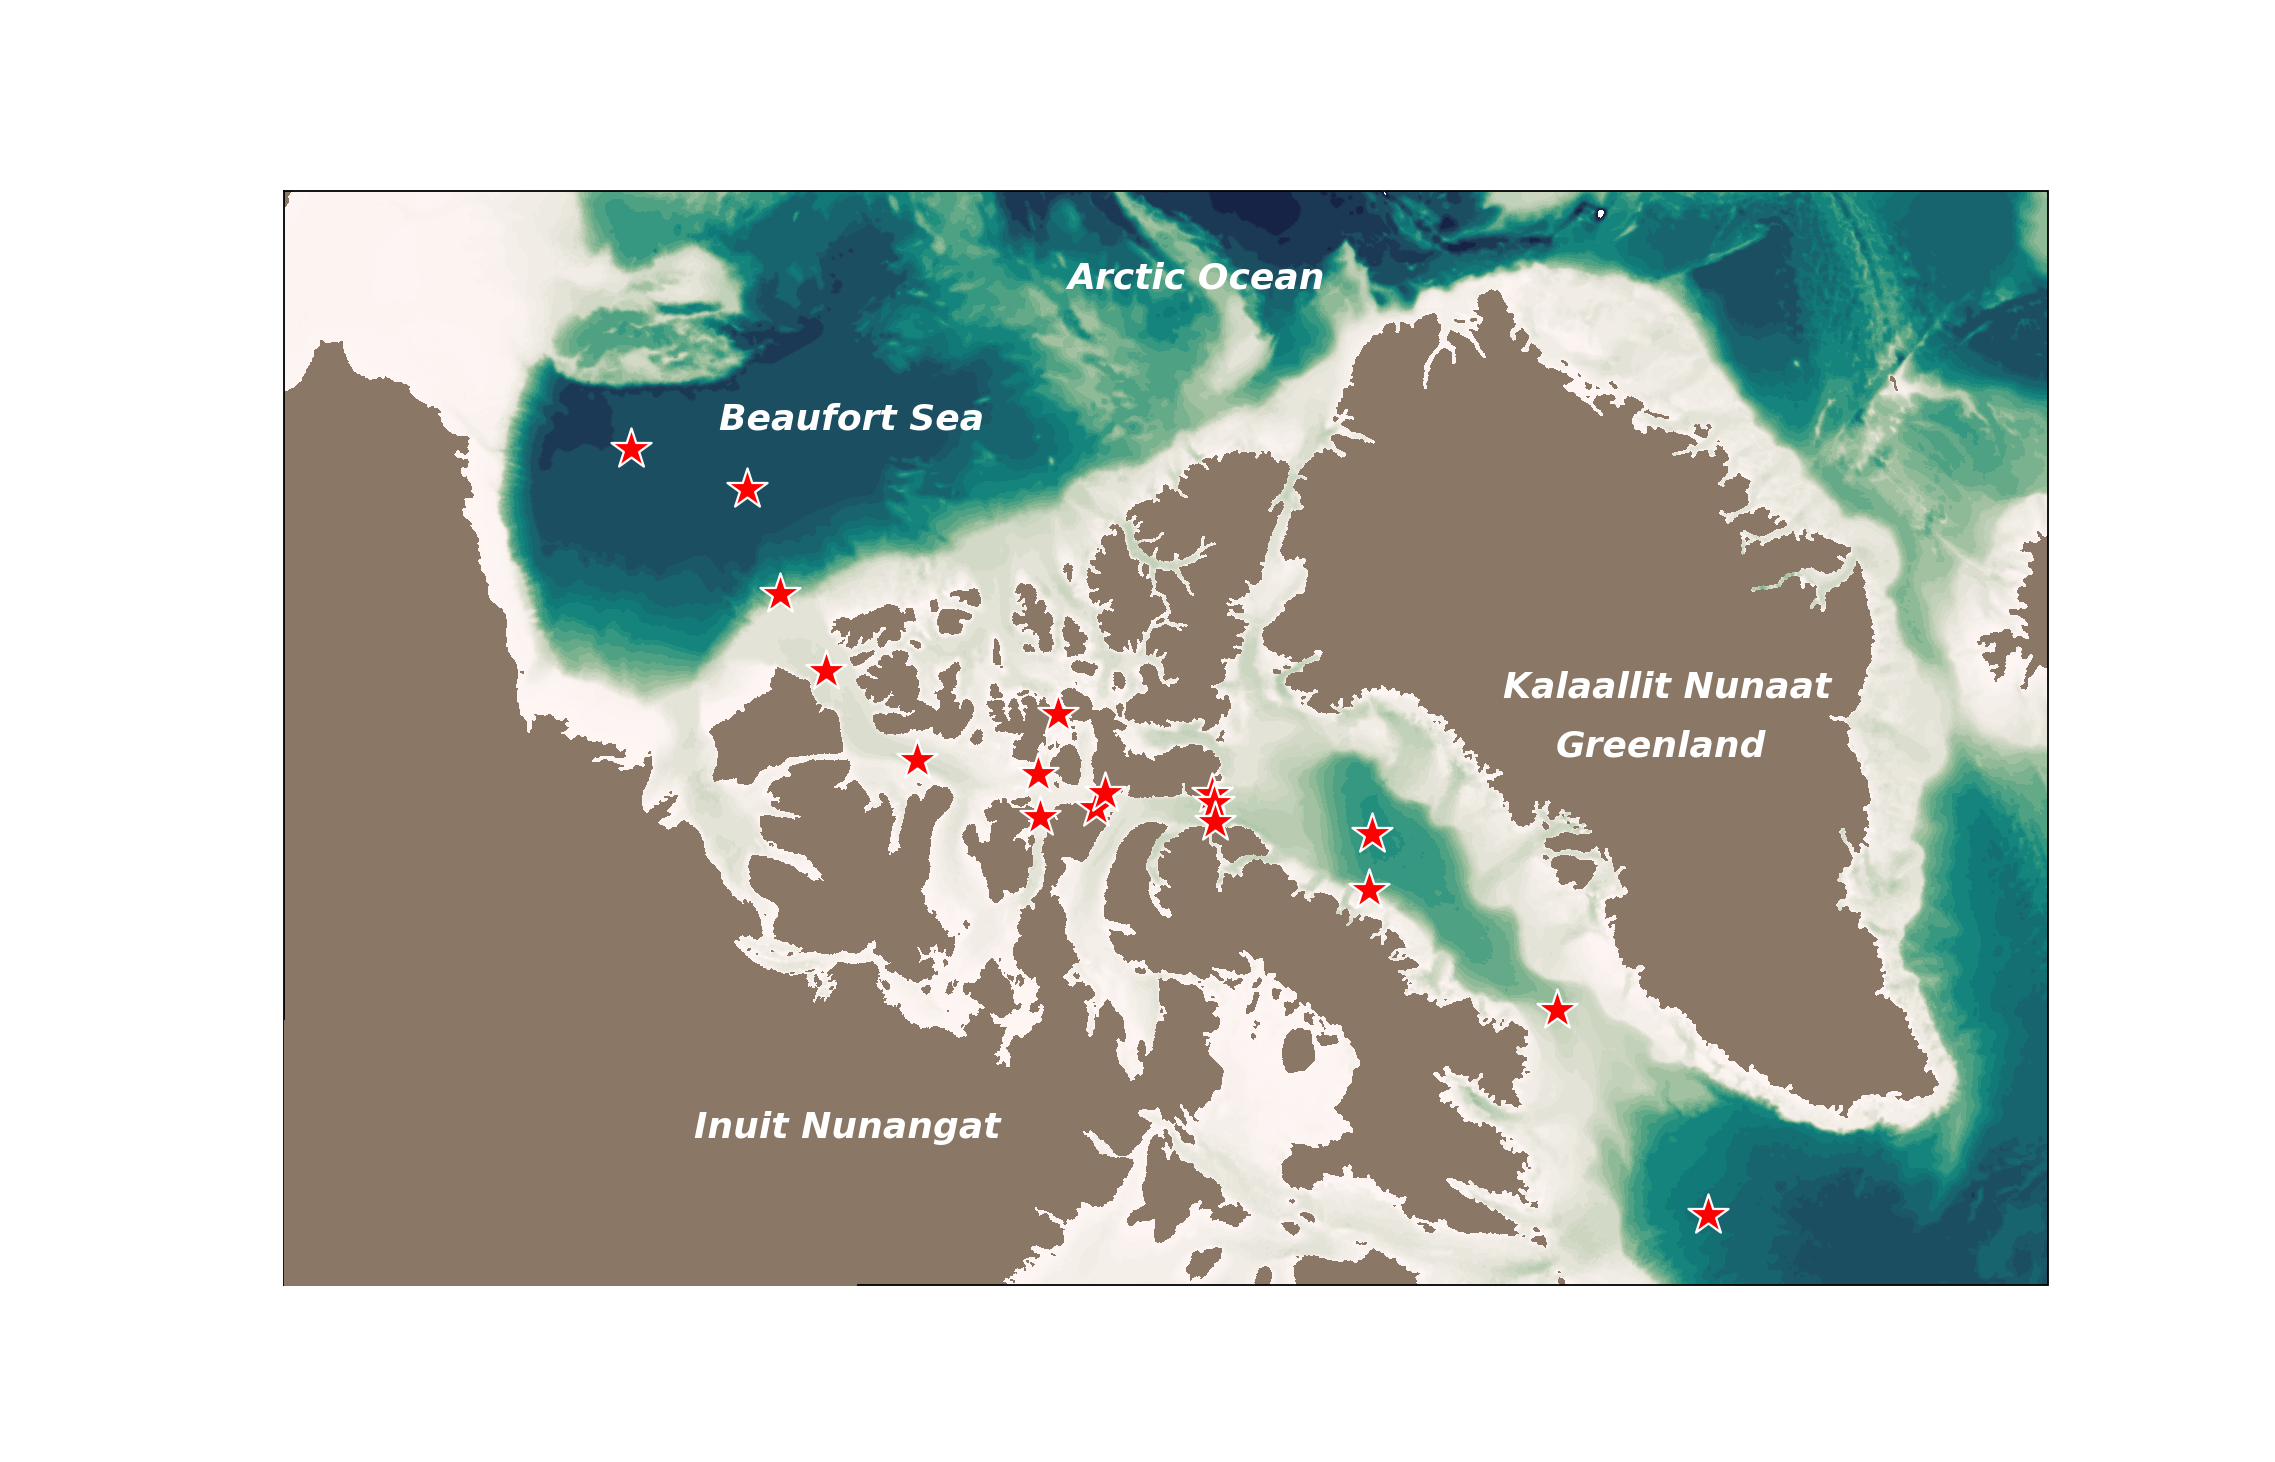

In [10]:
fig,ax = plt.subplots(figsize=(14,9))

proj=Basemap(projection='eqdc',lat_0 = 76, lon_0 = -85, resolution='i', width=5.0e6, height=3.1e6)
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)

clevels=[0, 20, 40, 60, 80, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, \
         1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400]
proj.contourf(x_mesh, y_mesh, mesh_bathy, clevels, cmap=cmocean.cm.tempo, zorder=1)
proj.contourf(x_mesh, y_mesh, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
plt.fill_between([0, 1.62e6], [0, 0], [747012, 747012], color=["#8b7765"], zorder=3)

x, y = proj(lons, lats)
proj.scatter(x, y, s=350, marker='*', c='r', edgecolors='w', zorder=4)

# features:
textx, texty = proj(lon_features1, lat_features1)
for i in range(len(features)):
    plt.text(textx[i], texty[i], features[i], fontsize=16, fontweight='bold', fontstyle='italic', color='w', \
            zorder=5)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/IUGG_GEOTRACES.png', bbox_inches='tight', dpi=700)